# Character extraction for GoT book

In [29]:
import numpy as np
import pandas as pd
import nltk
from collections import Counter
import matplotlib.pyplot as plt

## Character extraction with nltk

#### preprocess

In [30]:
def load_and_prep_nltk(path):
    """
    loads a book from specified location 
    removes punctuation and stopwords
    then applies tokenization and POS-tagging
    all with nltk
    """
    with open(path, 'r') as f:
        book = f.read()
#     book = nltk.tokenize.word_tokenize(book)
    
    tokenizer = nltk.RegexpTokenizer(r'\w+')
    book = tokenizer.tokenize(book)
    
    stop_words = set(nltk.corpus.stopwords.words('english'))
    book = [word for word in book if word not in stop_words]   
    
    book = nltk.pos_tag(book)
    return book

In [31]:
book = load_and_prep_nltk('data/GameOfThrones/A Game Of Thrones - George R. R. Martin.txt')
book[:40]

[('A', 'DT'),
 ('Game', 'NNP'),
 ('Thrones', 'NNP'),
 ('A', 'NNP'),
 ('Bantam', 'NNP'),
 ('Spectra', 'NNP'),
 ('Book', 'NNP'),
 ('SPECTRA', 'NNP'),
 ('portrayal', 'NN'),
 ('boxed', 'VBD'),
 ('trademarks', 'NNS'),
 ('Bantam', 'NNP'),
 ('Books', 'NNP'),
 ('division', 'NN'),
 ('Random', 'NNP'),
 ('House', 'NNP'),
 ('Inc', 'NNP'),
 ('PUBLISHING', 'NNP'),
 ('HISTORY', 'NNP'),
 ('Bantam', 'NNP'),
 ('hardcover', 'NN'),
 ('edition', 'NN'),
 ('published', 'VBN'),
 ('September', 'NNP'),
 ('1996', 'CD'),
 ('Bantam', 'NNP'),
 ('paperback', 'NN'),
 ('edition', 'NN'),
 ('September', 'NNP'),
 ('1997', 'CD'),
 ('Maps', 'NNP'),
 ('James', 'NNP'),
 ('Sinclair', 'NNP'),
 ('Heraldic', 'NNP'),
 ('crests', 'VBZ'),
 ('Virginia', 'NNP'),
 ('Norey', 'NNP'),
 ('All', 'NNP'),
 ('rights', 'NNS'),
 ('reserved', 'VBD')]

#### extract characters

Extract proper nouns and count them to compare later with NER-nltk


In [32]:
NNPs = [word for word in book if word[1]=='NNP']
Counter(NNPs).most_common(20)

[(('Ser', 'NNP'), 953),
 (('Lord', 'NNP'), 926),
 (('Jon', 'NNP'), 820),
 (('Ned', 'NNP'), 783),
 (('Tyrion', 'NNP'), 564),
 (('Bran', 'NNP'), 539),
 (('Catelyn', 'NNP'), 484),
 (('Arya', 'NNP'), 453),
 (('Sansa', 'NNP'), 413),
 (('Robert', 'NNP'), 406),
 (('Robb', 'NNP'), 405),
 (('Dany', 'NNP'), 403),
 (('Stark', 'NNP'), 396),
 (('A', 'NNP'), 362),
 (('Lannister', 'NNP'), 345),
 (('Maester', 'NNP'), 255),
 (('Winterfell', 'NNP'), 242),
 (('My', 'NNP'), 241),
 (('King', 'NNP'), 232),
 (('Joffrey', 'NNP'), 228)]

In [33]:
def char_extraction_nltk(preprocessed, n):
    """
    extract entities from preprocessed text
    select entities labeled as people and return
    counts of n most frequent people mentioned 
    """
    preprocessed = nltk.ne_chunk(preprocessed)
    entities = preprocessed.pos()
    characters = [ent[0][0] for ent in entities if ent[1]=='PERSON']
    nltk_chars = Counter(characters).most_common(n)
    return nltk_chars

In [34]:
nltk_chars = char_extraction_nltk(book, 40)
nltk_chars

[('Ser', 903),
 ('Jon', 737),
 ('Lord', 734),
 ('Ned', 564),
 ('Tyrion', 483),
 ('Bran', 481),
 ('Robert', 400),
 ('Catelyn', 400),
 ('Arya', 390),
 ('Dany', 374),
 ('Sansa', 366),
 ('Robb', 362),
 ('Stark', 333),
 ('Lannister', 235),
 ('Maester', 212),
 ('Drogo', 189),
 ('Joffrey', 187),
 ('Lady', 163),
 ('Jorah', 161),
 ('Eddard', 156),
 ('Luwin', 135),
 ('Tywin', 131),
 ('Khal', 123),
 ('Arryn', 122),
 ('Rodrik', 120),
 ('Mormont', 118),
 ('Bronn', 116),
 ('Lysa', 113),
 ('Varys', 102),
 ('Cersei', 99),
 ('Littlefinger', 99),
 ('Viserys', 97),
 ('Jaime', 96),
 ('Father', 89),
 ('Watch', 88),
 ('Dothraki', 84),
 ('Pycelle', 81),
 ('Will', 79),
 ('Jory', 79),
 ('Night', 77)]

## Character extraction with Spacy

#### preprocess

In [48]:
import spacy
import en_core_web_sm

In [49]:
def load_and_prep_spacy(path):
    """
    loads a book from specified location 
    removes stopwords
    then transforms book to Spacy's 'doc' format
    """
    with open(path, 'r') as f:
        book = f.read().replace('\n', '')
    
    nlp = en_core_web_sm.load()
    nlp.max_length = 2_000_000
    for w in ['’s', '’m']:
        nlp.vocab[w].is_stop = True
    return nlp(book)

In [50]:
book = load_and_prep_spacy('data/GameOfThrones/A Game Of Thrones - George R. R. Martin.txt')
book.ents[:40]

(Bantam Books,
 Random House,
 Inc,
 September 1996Bantam,
 James Sinclair,
 Virginia Norey,
 1996,
 George R. R. MartinLibrary,
 Congress,
 95,
 Bantam Books,
 978,
 Bantam Books,
 Random House,
 Bantam Books,
 U.S. Patent and Trademark Office,
 Marca Registrada,
 Bantam Books,
 1540,
 Broadway,
 New York,
 New York,
 10036.v3.1_r2this one,
 Gared,
 Waymar Royce,
 fifty,
 Gared,
 Eight days,
 nine,
 Waymar Royce,
 Gared’s,
 forty years,
 the Night’s Watch,
 four years,
 first,
 hundred,
 tonight,
 tonight,
 Nine days,
 Wildling)

#### extract characters

In [51]:
def char_extraction_spacy(preprocessed, n):
    """
    extract entities from preprocessed text
    select entities labeled as people and return
    counts of n most frequent people mentioned 
    """
    characters = [ent.text for ent in preprocessed.ents if ent.label_=='PERSON']
    spacy_chars = Counter(characters).most_common(n)
    return spacy_chars

In [52]:
spacy_chars = char_extraction_spacy(book, 40)
spacy_chars

[('Ned', 622),
 ('Jon', 559),
 ('Catelyn', 369),
 ('Arya', 344),
 ('Robb', 300),
 ('Robert', 286),
 ('Sansa', 210),
 ('Joffrey', 181),
 ('Dany', 180),
 ('Dothraki', 121),
 ('Stark', 120),
 ('’m', 115),
 ('Luwin', 107),
 ('Ser Jorah', 97),
 ('Mormont', 93),
 ('Littlefinger', 84),
 ('Ser Rodrik', 83),
 ('Eyrie', 70),
 ('Sam', 68),
 ('Jaime', 65),
 ('Hand', 63),
 ('Grace', 62),
 ('Eddard Stark', 53),
 ('Aemon', 47),
 ('Khal Drogo', 47),
 ('Grenn', 46),
 ('Starks', 45),
 ('Jon Arryn', 45),
 ('Septa Mordane', 45),
 ('Hodor', 45),
 ('Kingsguard', 44),
 ('Rickon', 43),
 ('’s', 43),
 ('Mirri Maz Duur', 42),
 ('Robert’s', 41),
 ('Bronn', 41),
 ('Jon Snow', 40),
 ('Tywin', 38),
 ('Lady', 37),
 ('Summer', 35)]

## Comparison & conclusions

From what we can see NLTK extracts only three types of entities, and makes lots of mistakes labeling 'Night' or 'Watch' as people. It's entities consist of one word, which creates lots of duplicates or half-truths. 

Spacy does better job, it extracts more kinds of entities than nltk. It still has some false positives like "'m" or "'s" that are parts of mentioning a character in the text(eg. "Tywin 's"), but other than that all characters seem to be properly extracted with their full names like 'Ser Jorah' or 'Eddard Stark'.

In [53]:
def visualize(chars, title):
    height = [char[1] for char in chars]
    bars = [char[0] for char in chars]
    y_pos = np.arange(len(bars))

    plt.title(title)
    plt.barh(y_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    plt.yticks(y_pos, bars)
    plt.show()


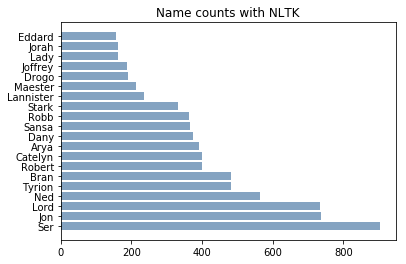

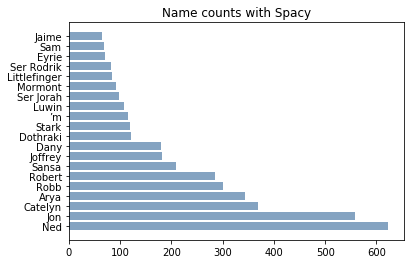

In [54]:
visualize(nltk_chars[:20], 'Name counts with NLTK')
visualize(spacy_chars[:20], 'Name counts with Spacy')

### Let's try other books:

Harry Potter and Deathly hallows


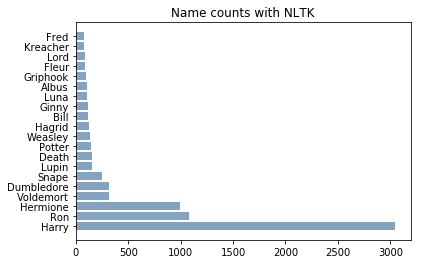

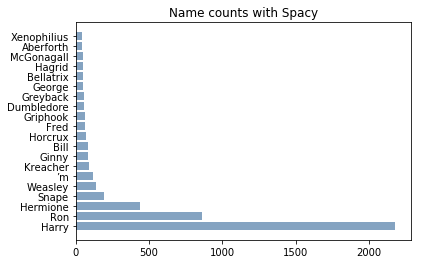

In [55]:
print("Harry Potter and Deathly hallows")

path = 'data/books/Harry Potter and the Deathly Ha - J.K. Rowling.txt'
preprocessed = load_and_prep_nltk(path)
visualize(char_extraction_nltk(preprocessed, 20), 'Name counts with NLTK')

preprocessed = load_and_prep_spacy(path)
visualize(char_extraction_spacy(preprocessed, 20), 'Name counts with Spacy')

Andrzej Sapkowski - Blood of Elves


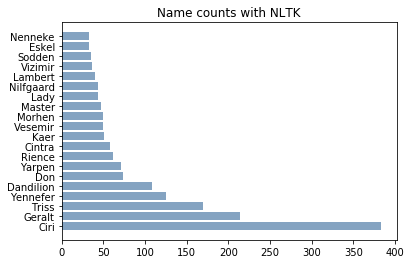

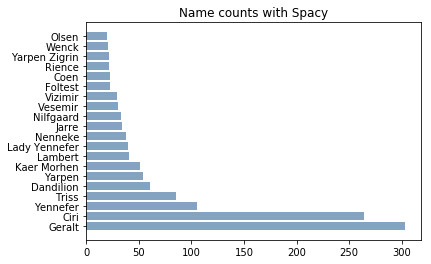

In [73]:
print("Andrzej Sapkowski - Blood of Elves")

path = 'data/books/Andrzej Sapkowski - Blood of El - DragonAshe.txt'
preprocessed = load_and_prep_nltk(path)
visualize(char_extraction_nltk(preprocessed, 20), 'Name counts with NLTK')

preprocessed = load_and_prep_spacy(path)
visualize(char_extraction_spacy(preprocessed, 20), 'Name counts with Spacy')